In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('california_housing_sklearn.csv')

In [3]:
df_copy = df.copy()

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
SalePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [6]:
df_copy.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: xlabel='Longitude', ylabel='Latitude'>

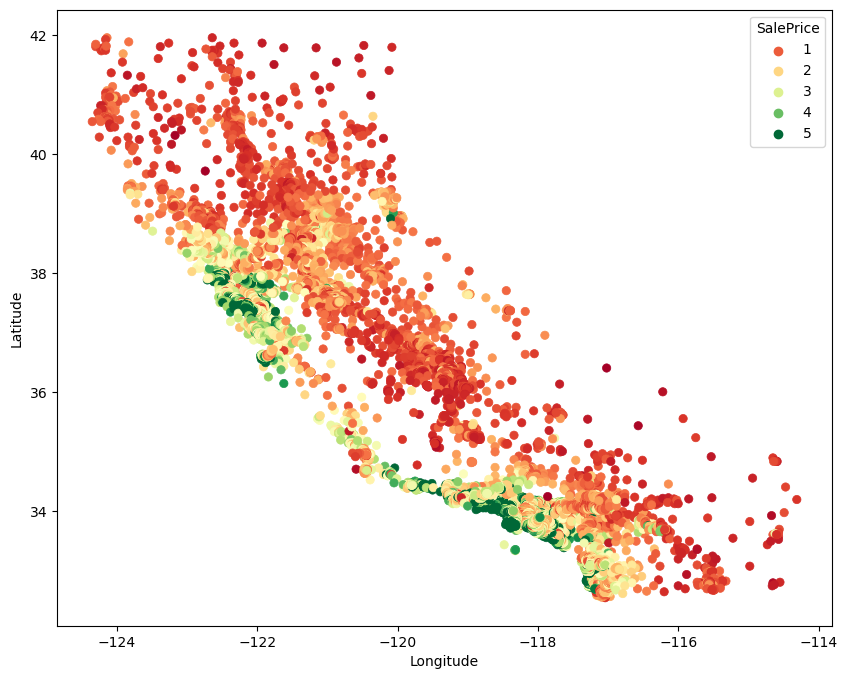

In [7]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = df_copy, hue = 'SalePrice',
               edgecolor = None, palette = 'RdYlGn')

<Axes: >

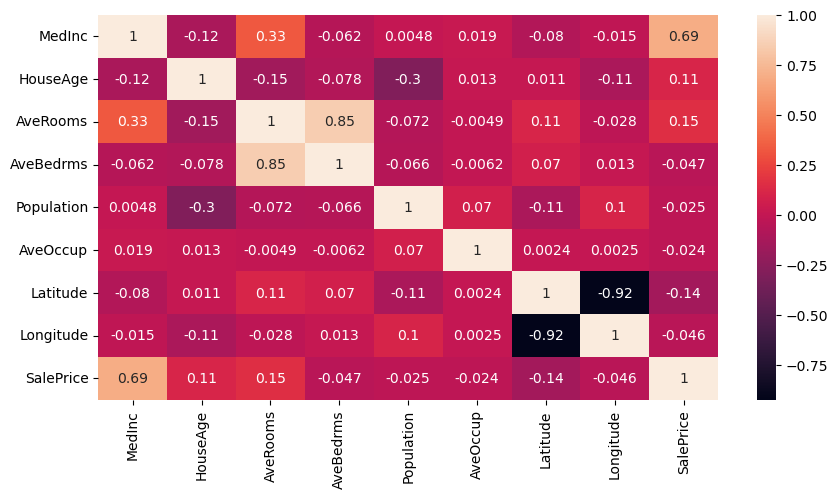

In [8]:
plt.figure(figsize = (10,5))
sns.heatmap(df_copy.corr(numeric_only = True), annot = True)

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df_copy.drop('SalePrice', axis = 1).values
y = df_copy['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=525)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [14]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

model = Sequential()
model.add(Dense(64, input_shape = (None, X_train.shape[1]), activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = RMSprop(), loss = 'mse', metrics=['mae'])

In [15]:
model.fit(x = X_train_scaled,
         y = y_train,
         epochs = 500,
         batch_size = 128,
         validation_data = (X_test_scaled, y_test),
         callbacks = [early_stop])

Epoch 1/500
121/121 [==============================] - 1s 5ms/step - loss: 1.3970 - mae: 0.7888 - val_loss: 0.5885 - val_mae: 0.5559
Epoch 2/500
121/121 [==============================] - 0s 3ms/step - loss: 0.5839 - mae: 0.5064 - val_loss: 0.4486 - val_mae: 0.4709
Epoch 3/500
121/121 [==============================] - 0s 3ms/step - loss: 0.4193 - mae: 0.4625 - val_loss: 0.4077 - val_mae: 0.4499
Epoch 4/500
121/121 [==============================] - 0s 3ms/step - loss: 0.3894 - mae: 0.4460 - val_loss: 0.3936 - val_mae: 0.4409
Epoch 5/500
121/121 [==============================] - 0s 3ms/step - loss: 0.3719 - mae: 0.4350 - val_loss: 0.3657 - val_mae: 0.4323
Epoch 6/500
121/121 [==============================] - 0s 3ms/step - loss: 0.3648 - mae: 0.4262 - val_loss: 0.3778 - val_mae: 0.4218
Epoch 7/500
121/121 [==============================] - 0s 3ms/step - loss: 0.3559 - mae: 0.4196 - val_loss: 0.3506 - val_mae: 0.4211
Epoch 8/500
121/121 [==============================] - 0s 3ms/step - 

<Axes: >

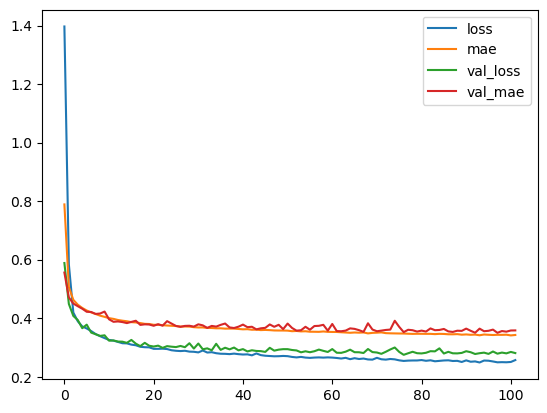

In [16]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [17]:
pred_test = pd.DataFrame(model.predict(X_test_scaled), columns = ['predicted_sale'])

162/162 [==============================] - 1s 2ms/step


In [18]:
pred_test['actual_sale'] = y_test

In [19]:
pred_test.head()

,predicted_sale,actual_sale
0,0.563154,0.629
1,0.687575,0.510
2,1.607830,1.009
3,2.065866,2.401
4,1.652217,1.286


<Axes: xlabel='actual_sale', ylabel='predicted_sale'>

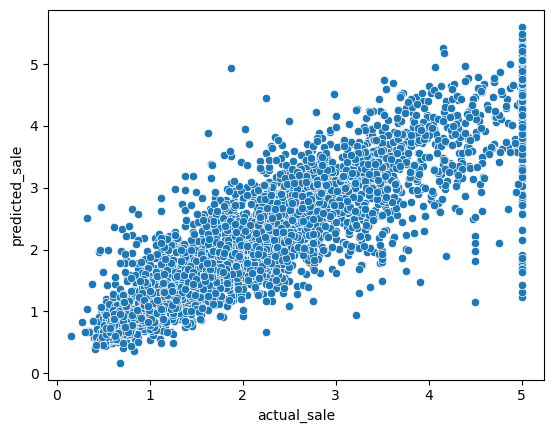

In [20]:
sns.scatterplot(x = pred_test['actual_sale'], y = pred_test['predicted_sale'])

### Evaluating the Model

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error, r2_score

In [22]:
y_pred = model.predict(X_test_scaled)

162/162 [==============================] - 0s 2ms/step


In [23]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred)** 0.5) 

MAE:  0.35816600834809253
MAPE:  0.2013667593855192
MSE:  0.28071400579808303
R2 Score:  0.7940475880261182
RMSE:  0.5298245047164986


## Creating Model using Scikit Learn

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
dtree = DecisionTreeRegressor()

params = {'max_depth': range(2,8,2), 
          'min_samples_split': range(2,8,2),
          'min_samples_leaf': range(1,4,1),
          'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = dtree, param_grid = params)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 8, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 8, 2)})

In [28]:
print(grid_search.best_estimator_)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=4)


In [29]:
dtree = DecisionTreeRegressor(max_depth=6, max_features='auto')
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto')

### Evaluating the Model

In [30]:
lr_pred = lr.predict(X_test)

In [31]:
dtree_pred = dtree.predict(X_test)

In [32]:
print('Logistic Regression metrics: ')
print('MAE: ', mean_absolute_error(y_test, lr_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, lr_pred))
print('MSE: ', mean_squared_error(y_test, lr_pred))
print('R2 Score: ', r2_score(y_test, lr_pred))
print('RMSE: ', mean_squared_error(y_test, lr_pred)** 0.5) 
print('\n')

print('Decision Tree metrics: ')
print('MAE: ', mean_absolute_error(y_test, dtree_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, dtree_pred))
print('MSE: ', mean_squared_error(y_test, dtree_pred))
print('R2 Score: ', r2_score(y_test, dtree_pred))
print('RMSE: ', mean_squared_error(y_test, dtree_pred)** 0.5) 

Logistic Regression metrics: 
MAE:  0.5312142035512967
MAPE:  0.3146336155928789
MSE:  0.5313437693367998
R2 Score:  0.6101671857409149
RMSE:  0.7289333092518134


Decision Tree metrics: 
MAE:  0.5003855231281232
MAPE:  0.3014259373197879
MSE:  0.4977970931267878
R2 Score:  0.6347794912777054
RMSE:  0.7055473712847266


Text(0.5, 1.0, 'Feature Importance of \n Each Attribute (Decision Tree)')

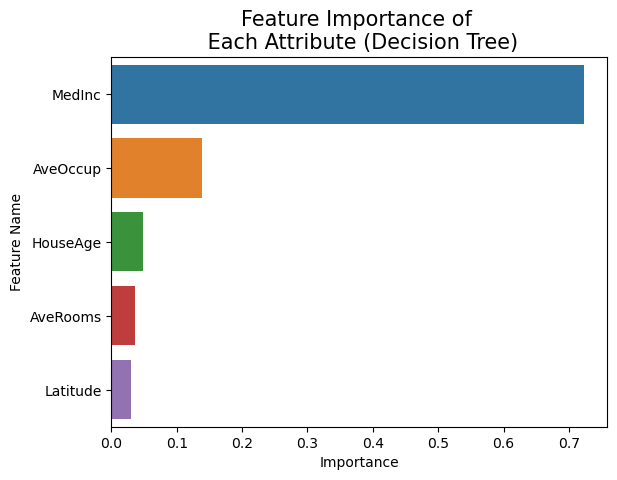

In [33]:
df_imp = pd.DataFrame({'Feature Name': df_copy.drop('SalePrice', axis = 1).columns,
                      'Importance': dtree.feature_importances_ })

df_imp = df_imp.sort_values(by = 'Importance', ascending = False). head()

sns.barplot(x = 'Importance', y = 'Feature Name', data = df_imp)
plt.title('Feature Importance of \n Each Attribute (Decision Tree)', fontsize = 15)